In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

Text(0.5, 1.0, 'QI (g/kg) Z. mean (test-ctrl) at step 21')

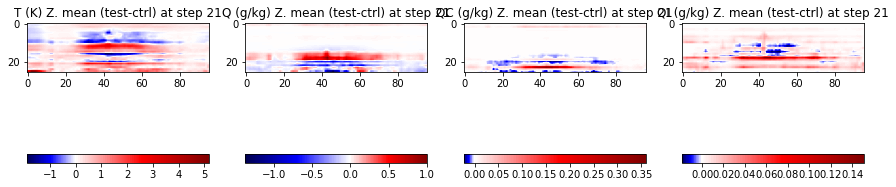

In [26]:
path0 = "/scratch/00993/tg802402/CTRLrealgeographyonline003/run" # v8 fit -- ice issues.
#path = "/scratch/00993/tg802402/NNrealgeographyonline003/run" # v8 fit -- ice issues.
path = "/scratch/00993/tg802402/NNrealgeographyonline004-v11fit/run" # v11 fit -- 10x weight to ice (I think)
files = xr.open_mfdataset(path+"/*.cam.h1.2007-04-02-[0123]*.nc")
files0 = xr.open_mfdataset(path0+"/*.cam.h1.2007-04-02-[0123]*.nc")

it=20
plt.figure(figsize=(15,10))
T= files.TBP.isel(time=it).mean(dim=("lon")).values
T0= files0.TBP.isel(time=it).mean(dim=("lon")).values

Q= files.QBP.isel(time=it).mean(dim=("lon")).values
Q0= files0.QBP.isel(time=it).mean(dim=("lon")).values

QC= files.CLDLIQBP.isel(time=it).mean(dim=("lon")).values
QC0= files0.CLDLIQBP.isel(time=it).mean(dim=("lon")).values

QI= files.CLDICEBP.isel(time=it).mean(dim=("lon")).values
QI0= files0.CLDICEBP.isel(time=it).mean(dim=("lon")).values

plt.subplot(141)
plt.imshow(T-T0,norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar(orientation='horizontal')
plt.title ("T (K) Z. mean (test-ctrl) at step "+str(it+1))

plt.subplot(142)
plt.imshow(1000.*(Q-Q0),norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar(orientation='horizontal')
plt.title ("Q (g/kg) Z. mean (test-ctrl) at step "+str(it+1))

plt.subplot(143)
plt.imshow(1000.*(QC-QC0),norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar(orientation='horizontal')
plt.title ("QC (g/kg) Z. mean (test-ctrl) at step "+str(it+1))

plt.subplot(144)
plt.imshow(1000.*(QI-QI0),norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar(orientation='horizontal')
plt.title ("QI (g/kg) Z. mean (test-ctrl) at step "+str(it+1))

#plt.clim(-0.4,0.4)


# 

Text(0.5, 1.0, 'TEST-CTRL')

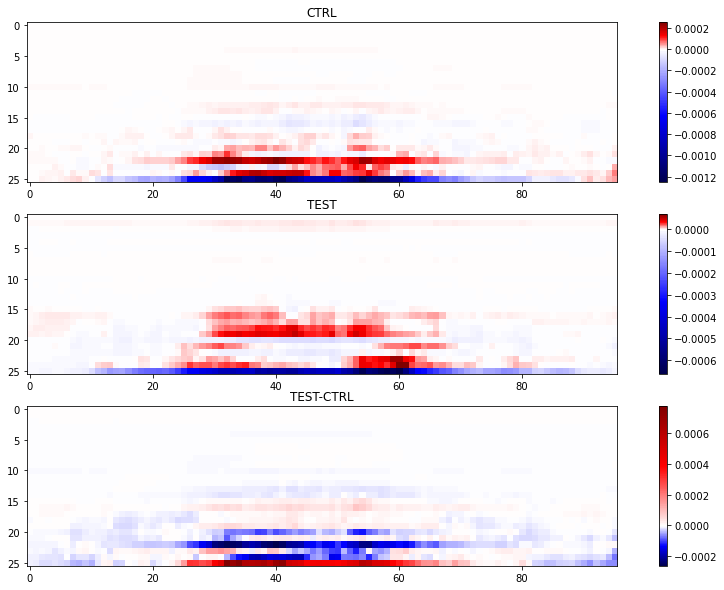

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.imshow(Q0,norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar()
plt.title ('CTRL')
#plt.clim(-0.4,0.4)
plt.subplot(312)
plt.imshow(Q,norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar()
plt.title ('TEST')
#plt.clim(-0.4,0.4)
plt.subplot(313)
anomaly = Q-Q0
plt.imshow(anomaly,norm=TwoSlopeNorm(0), cmap=plt.cm.seismic)
plt.colorbar()
plt.title ('TEST-CTRL')
#plt.clim(-0.4,0.4)

